[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/ProjIntegrador_PO_IA/blob/main/redes.ipynb)


# Projeto Integrador - Aplicações de Pesquisa Operacional e Inteligência Artificial

Prof: Diogo Ferreira de Lima Silva (TEP - UFF)

# Otimização em Redes

In [2]:
import networkx as nx

Vamos criar o grafo visto na aula!

Para isso, podemos usar a biblioteca networkx!

In [9]:
# Instanciando o nosso grafo e atribuindo o grafo à G
G = nx.Graph()

No momento, nosso grafo é apenas uma instância vazia. Não possui vértices nem arestas!

In [12]:
G

In [13]:
G.nodes

NodeView(())

In [14]:
G.edges

EdgeView([])

Para inserir vértices no grafo, basta usar o método .add_nodes_from

In [17]:
G.add_nodes_from(["O", "A", "B", "C", "D", "E", "T"])
G.nodes


NodeView(('O', 'A', 'B', 'C', 'D', 'E', 'T'))

Algo parecido pode ser usado para inserir as arestas!

Lembrando que para os problemas AGM e caminho mínimo, nossas arestas possuem os seguintes pesos:

In [18]:
G.add_edges_from ([("O", "A", {"distância": 2}),
                   ("O", "B", {"distância": 5}),
                   ("O", "C", {"distância": 4}),
                   ("A", "B", {"distância": 2}),
                   ("A", "D", {"distância": 7}),
                   ("B", "C", {"distância": 1}),
                   ("B", "D", {"distância": 4}),
                   ("B", "E", {"distância": 3}),
                   ("C", "E", {"distância": 4}),
                   ("D", "E", {"distância": 1}),
                   ("D", "T", {"distância": 5}),
                   ("E", "T", {"distância": 7})])

Vamos visualizar o nosso grafo!

In [19]:
import matplotlib.pyplot as plt

{('O', 'A'): Text(-0.6957734602470755, -0.025947899980011735, '2'),
 ('O', 'B'): Text(-0.49612209023932285, 0.20825633790150944, '5'),
 ('O', 'C'): Text(-0.4698827625007839, 0.5154147978560931, '4'),
 ('A', 'B'): Text(-0.39423532023172975, -0.15223530649164985, '2'),
 ('A', 'D'): Text(-0.1776048781968134, -0.4225729411466135, '7'),
 ('B', 'C'): Text(-0.1683446224854382, 0.38912739134445495, '1'),
 ('B', 'D'): Text(0.022046491810939248, -0.18836870326509234, '4'),
 ('B', 'E'): Text(0.14748764069759757, 0.11690423784656766, '3'),
 ('C', 'E'): Text(0.1737269684361365, 0.4240626978011513, '4'),
 ('D', 'E'): Text(0.3641180827325139, -0.15343339680839602, '1'),
 ('D', 'T'): Text(0.6193384669229278, -0.43909926351607553, '5'),
 ('E', 'T'): Text(0.7447796158095861, -0.13382632240441555, '7')}

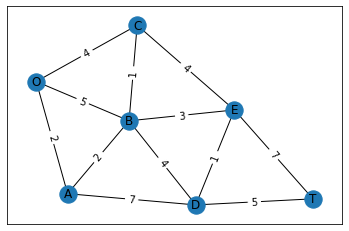

In [34]:
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'distância')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

## Árvore Geradora Mínima

In [37]:
AGM = nx.minimum_spanning_tree(
    G,                  
    weight='distância',
    algorithm='prim'    # Definindo o algoritmo ultilizado como sendo Prim. Poderíamos usar 'kruskal' por exemplo.
    )

print(f"As arestas de nossa árvore geradora mínima são:\n{AGM.edges}") # Exibe o número de nós e arestas da AGM
print(f"O custo obtido pela árvore geradora mínima é: {sum(AGM.edges[e]['distância'] for e in AGM.edges)}")

As arestas de nossa árvore geradora mínima são:
[('O', 'A'), ('A', 'B'), ('B', 'C'), ('B', 'E'), ('D', 'E'), ('D', 'T')]
O custo obtido pela árvore geradora mínima é: 14


## Caminho Mais Curto

In [36]:
# Calcula o Caminho Mínimo e retorna uma lista de nós
vertices = nx.shortest_path(
    G,
    source= "O",
    target= "T",
    weight= 'distância',
    method= 'dijkstra'
    )

# Calcula o comprimento do Caminho Mínimo
comprimento = nx.shortest_path_length(
   G,
    source= "O",
    target= "T",
    weight= 'distância',
    method= 'dijkstra'
    )

print(f'Caminho mais curto:{vertices}\nComprimento do caminho:{comprimento}')

Caminho mais curto:['O', 'A', 'B', 'D', 'T']
Comprimento do caminho:13


## Fluxo Máximo

No problema do fluxo máximo, nosso grafo é um pouco diferente. 

Lembre que agora temos capacidades na rede residual, não distâncias!

In [38]:
G = nx.Graph()
G.add_nodes_from(["O", "A", "B", "C", "D", "E", "T"])
G.add_edges_from([("O", "A", {"distância": 2, "capacidade":5}),
                   ("O", "B", {"distância": 5, "capacidade":7}),
                   ("O", "C", {"distância": 4, "capacidade":4}),
                   ("A", "B", {"distância": 2, "capacidade":1}),
                   ("A", "D", {"distância": 7, "capacidade":3}),
                   ("B", "C", {"distância": 1, "capacidade":2}),
                   ("B", "D", {"distância": 4, "capacidade":4}),
                   ("B", "E", {"distância": 3, "capacidade":5}),
                   ("C", "E", {"distância": 4, "capacidade":4}),
                   ("E", "D", {"distância": 1, "capacidade":1}),
                   ("D", "T", {"distância": 5, "capacidade":9}),
                   ("E", "T", {"distância": 7, "capacidade":6})])

In [41]:
# Calcula o fluxo máximo
fluxo_max, fluxo_dict = nx.maximum_flow(G, 'O', 'T', capacity = 'capacidade')
print("Fluxo máximo:", fluxo_max)
print("Dicionário de fluxo:", fluxo_dict)

Fluxo máximo: 14
Dicionário de fluxo: {'O': {'A': 4, 'B': 6, 'C': 4}, 'A': {'O': 0, 'B': 1, 'D': 3}, 'B': {'O': 0, 'A': 0, 'C': 0, 'D': 4, 'E': 3}, 'C': {'O': 0, 'B': 0, 'E': 4}, 'D': {'A': 0, 'B': 0, 'E': 0, 'T': 8}, 'E': {'B': 0, 'C': 0, 'D': 1, 'T': 6}, 'T': {'D': 0, 'E': 0}}


## Fluxo Máximo X Corte Mínimo

In [44]:
# Corte mínimo
corte_min, part = nx.minimum_cut(G, 'O', 'T', capacity = 'capacidade')
# Imprime os resultados
print("Valor do Corte Mínimo:", corte_min)
print("Partição dos vértices a partir do corte mínimo:", part)

Valor do Corte Mínimo: 14
Partição dos vértices a partir do corte mínimo: ({'O', 'C', 'B', 'A', 'E'}, {'D', 'T'})


# Pyomo - Modendo problemas de Otimização

## Problema dos Transportes

Uma empresa possui três fábricas que produzem carrinhos de bebê que devem ser remetidos para quatro centros de distribuição. As Fábricas F1, F2 e F3 produzem, respectivamente, 12, 17 e 11 remessas por mês. Cada centro de distribuição CD precisa receber dez remessas por mês. Com base na tabela de custos abaixo, que mostra o custo unitário de transporte das Fábricas à cada CD, quanto deve ser remetido de cada fábrica para cada um dos centros de distribuição para minimizar o custo total de transporte?

<center>

|Fábrica|$CD1$|$CD2$|$CD3$|$CD4$|
|:-----:|:---:|:---:|:---:|:---:|
|$F1$   |40100|65100|20100|35100|
|$F2$   |55100|70100|30100|50100|
|$F3$   |30100|60100|40100|45100|

</center>


## Formulação do Problema

A formulação deste modelo seria uma instância do problema de transporte, podendo ser dado como:

$$
\text{Min } z = 40100x_{11} + 65100x_{12} + 20100x_{13} + 35100x_{14} + 55100x_{21} + 70100x_{22} + 30100x_{23} + 50100x_{24} + 30100x_{31} + 60100x_{32} + 40100x_{33} + 45100x_{34}\\
$$
$$
\begin{equation}
  \begin{array}{rll}
    \text{Sujeito a: } & & \\
    & x_{11} + x_{12} + x_{13} + x_{14} \le 12 & \text{(Fábrica 1)} \\
    & x_{21} + x_{22} + x_{23} + x_{24} \le 17 & \text{(Fábrica 2)} \\
    & x_{31} + x_{32} + x_{33} + x_{34} \le 11 & \text{(Fábrica 3)} \\
    & x_{11} + x_{21} + x_{31} \ge 10 & \text{(Centro de Distribuição 1)} \\
    & x_{12} + x_{22} + x_{32} \ge 10 & \text{(Centro de Distribuição 2)} \\
    & x_{13} + x_{23} + x_{33} \ge 10 & \text{(Centro de Distribuição 3)} \\
    & x_{14} + x_{24} + x_{34} \ge 10 & \text{(Centro de Distribuição 4)} \\
    & x_{ij} \ge 0 \\
  \end{array}
\end{equation}
$$
Onde $x_{ij}$ é a quantidade de remessas enviadas da fábrica $i$ para o centro de distribuição $j$.

In [ ]:
#Execute esse bloco caso esteja executando no Google Colab
!pip install -q pyomo
!pip install -i https://pypi.gurobi.com gurobipy



In [ ]:
import pyomo.environ as pyo # Importando o Pyomo

In [ ]:
c = pd.DataFrame ([[40100, 65100, 20100, 35100], # F1
                    [55100, 70100, 30100, 50100], # F2
                    [30100, 60100, 40100, 45100]])

c_dict = c.stack().to_dict()

# Vamos armazenar nossas ofertas e demandas nas listas abaixo:
a = [12, 17, 11]
b = [10, 10, 10, 10]

m = len(a)
n = len(b)

In [ ]:
# Criando uma instância do modelo
M = pyo.ConcreteModel() 

In [ ]:
# Criando dois índices para serem usados no pyomo
M.fabricas = pyo.Set(initialize = range(m)) # Índice para as fábricas
M.cds = pyo.Set(initialize = range(n)) # Índice para os centros de distribuição

In [ ]:
# PASSANDO OS PARÂMETROS DO PROBLEMA

# Custos de transporte da fábrica i para o centro de dsitribuição j
M.custos = pyo.Param(M.fabricas, M.cds, initialize = c_dict)

# Capacidade de cada fábrica
M.capacidades = pyo.Param (M.fabricas, initialize = a)

# Demanda de cada centro de distribuição
M.demandas = pyo.Param (M.cds, initialize = b)

In [ ]:
# VARIÁVEIS DE DECISÃO
# xij representa a quantidade de remessas enviada da fábrica i para o CD j
M.x = pyo.Var(M.fabricas, M.cds, within= pyo.NonNegativeReals)

In [ ]:
def custo_total (M):
    return sum(M.x[i,j] * M.custos[i,j] for i in M.fabricas for j in M.cds)

# FUNÇÃO OBJETIVO
M.obj = pyo.Objective(rule= custo_total ,sense= pyo.minimize)
  

In [ ]:
# R1: O total de remessas despachada por cada fábrica não pode ser maior que a sua oferta.
M.R_ofertas = pyo.Constraint(M.fabricas, rule= lambda M, i: sum(M.x[i, j] for j in M.cds) <= M.capacidades[i])

# R2: Cada centro de distribuição deve ter a sua demanda atendida
M.R_demandas = pyo.Constraint(M.cds, rule= lambda M, j: sum(M.x[i, j] for i in M.fabricas) >= M.demandas[j])

In [ ]:
# RESOLUÇÃO DO MODELO
pyo.SolverFactory('gurobi').solve(M)

In [ ]:
print(f"z= {pyo.value(M.obj)}")

for k in M.x.keys(): 
    if pyo.value(M.x[k]) > 0:
        print (f"x_{k} = {pyo.value(M.x[k])}")